<a href="https://colab.research.google.com/github/Kaiziferr/-Miner_Detector/blob/master/multilayer_perceptron/07_workshop_learningrate_adaptative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow 

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/datasets/main/diabetes.csv')
data_values = data.values

# **Split data**
---



In [3]:
X = data_values[:,:8].astype('float')
y = data_values[:,8]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle=True, random_state=1234) 

In [5]:
# Encoder
encoder = LabelEncoder()
y_train_encoder = encoder.fit_transform(y_train)
y_test_encoder = encoder.transform(y_test)

In [6]:
# Escalar
estimator_scaler = StandardScaler()
X_train_scaler = estimator_scaler.fit_transform(X_train)
X_test_scaler = estimator_scaler.transform(X_test)

In [7]:
def optimization_learning_curves(history, metrica, title: str= '', x_size:int=8, y_size:int=4, 
                                 font_size:int=15, x_label:str='Epoch',y_label:str='Loss')->None:
  fig, ax = plt.subplots(figsize = (x_size, y_size))
  fig.suptitle(title, fontsize = font_size)
  ax.plot(history.history[metrica])
  ax.plot(history.history[f'val_{metrica}'])
  ax.set_xlabel(x_label, size = 12)
  ax.set_ylabel(y_label, size = 12)
  ax.legend(['Train', 'Test'], loc = 'upper left', fontsize = 12)
  ax.tick_params(labelsize = 12)
  fig.show()

# **Optimizador Adaptativo Adam**

---



In [32]:
model = Sequential()
model.add(Dense(1, input_dim=8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1,activation='sigmoid', kernel_initializer='glorot_uniform'))

In [33]:
model.compile(loss='binary_crossentropy', optimizer='adam')
history = model.fit(X_train_scaler, y_train_encoder, validation_data=(X_test_scaler, y_test_encoder),
                    epochs=100, batch_size=5, verbose = 1)

Epoch 1/100
123/123 [==============================] - 2s 3ms/step - loss: 0.7418 - val_loss: 0.7222
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 0.7034 - val_loss: 0.6899
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6796 - val_loss: 0.6697
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6643 - val_loss: 0.6550
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6533 - val_loss: 0.6445
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6449 - val_loss: 0.6357
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6380 - val_loss: 0.6283
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6316 - val_loss: 0.6214
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6255 - val_loss: 0.6158
Epoch 10/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6194 - val_lo

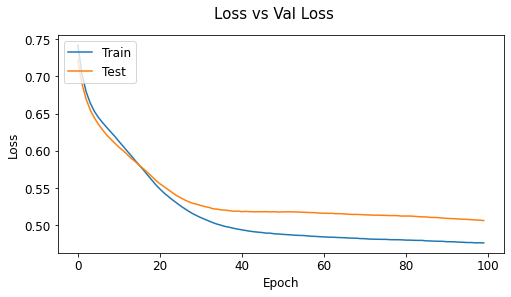

In [34]:
optimization_learning_curves(history, metrica='loss', title='Loss vs Val Loss')

# **Planificación de learning rate en función del tiempo**

---



In [28]:
model2 = Sequential()
model2.add(Dense(1, input_dim=8, activation='relu', kernel_initializer='glorot_uniform'))
model2.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

In [29]:
epoch = 100
lr = 0.1
decay_rate = lr/epoch
momentum = 0.8

sgd = SGD(learning_rate=lr, momentum=momentum, decay = decay_rate, nesterov=False)
model2.compile(loss='binary_crossentropy', optimizer=sgd)

In [30]:
history2 = model2.fit(X_train_scaler, y_train_encoder, validation_data=(X_test_scaler, y_test_encoder), 
           epochs=epoch, batch_size=5, verbose = 1)

Epoch 1/100
123/123 [==============================] - 2s 7ms/step - loss: 0.6070 - val_loss: 0.6032
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5557 - val_loss: 0.5455
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5274 - val_loss: 0.5296
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5302 - val_loss: 0.5137
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5059 - val_loss: 0.5410
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5208 - val_loss: 0.5492
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5088 - val_loss: 0.4950
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5012 - val_loss: 0.5596
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5079 - val_loss: 0.5037
Epoch 10/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4945 - val_lo

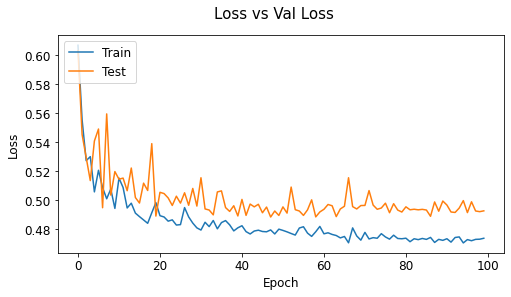

In [31]:
optimization_learning_curves(history2, metrica='loss', title='Loss vs Val Loss')

# **Tasa de aprendizaje basado en caidas (drop)**

---



In [35]:
def step_decay(epochs):
  intial_rate = 0.1
  drop = 0.5
  epochs_drop = 10
  lrate = intial_rate * np.power(drop, np.floor(1+epochs) / epochs_drop)
  return lrate

In [36]:
model3 = Sequential()
model3.add(Dense(1, input_dim=8, activation='relu', kernel_initializer='glorot_uniform'))
model3.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))

In [37]:
sgd = SGD(learning_rate=0.0, momentum = 0.9)
model3.compile(loss = 'binary_crossentropy', optimizer=sgd)

In [38]:
lrate = LearningRateScheduler(step_decay)
callback_list = [lrate]

In [39]:
history3 = model3.fit(X_train_scaler, y_train_encoder, validation_data=(X_test_scaler, y_test_encoder), 
           epochs=100, batch_size=5, callbacks=callback_list, verbose=1)

Epoch 1/100
123/123 [==============================] - 1s 3ms/step - loss: 0.5904 - val_loss: 0.6119 - lr: 0.0933
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 0.6031 - val_loss: 0.5604 - lr: 0.0871
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5688 - val_loss: 0.5665 - lr: 0.0812
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5837 - lr: 0.0758
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5610 - val_loss: 0.7978 - lr: 0.0707
Epoch 6/100
123/123 [==============================] - 0s 3ms/step - loss: 0.6169 - val_loss: 0.5466 - lr: 0.0660
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5591 - val_loss: 0.6450 - lr: 0.0616
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5511 - val_loss: 0.5644 - lr: 0.0574
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.5571 - val_

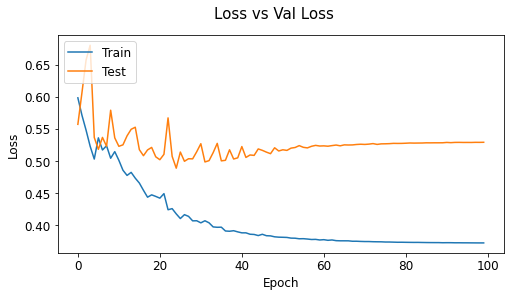

In [20]:
optimization_learning_curves(history3, metrica='loss', title='Loss vs Val Loss')

# **Notas**
---

- Incrementar la tasa de aprendizaje inicial, debido a que la tasa de aprendizaje disminuira, inicie con un valor mayor desde el cual disminuir

- Utilizar un gran momentum

- Experimente con diferentes planificacion

# **Concluciones**
---

- Se aprecia que en el método adam la reducción del error de entrenamiento se reduce a la par, que el error de validación.
- En el segundo y tercer método el error de entrenamiento se reduce más rápido que el de validación, con diferentes combinaciones de hiperparametros. 

- Existe un overfiting. En el primer es menor en comparación a los ultmos metrodos 

- Hay que investigar si el sobreaprendizaje del método de caídas drop y la planificación de learning rate en función del tiempo tiene relación con la reducción rápida del entrenamiento. Cabe resaltar que hay otros consideraciones a tener en cuenta, como el conjunto de datos, los hiperparametros entre otros. Con el adam es más estable el proceso, pero también se presenta overfiting, pero eso puede pasar por diversas razones.